In [1]:
#Machin_Learning
#K_means
#Kmeans

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
%matplotlib inline

# Import and print the dataset

In [6]:
df=pd.read_csv('Mall_Customers.csv')

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.shape

(200, 5)

In [11]:
df.drop(['CustomerID','Gender','Age'],axis=1,inplace=True)

In [12]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [13]:
print('Annual Income',df['Annual Income (k$)'].unique())
print('Spending Score',df['Spending Score (1-100)'].unique())

Annual Income [ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]
Spending Score [39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]


<Axes: xlabel='Annual Income (k$)', ylabel='count'>

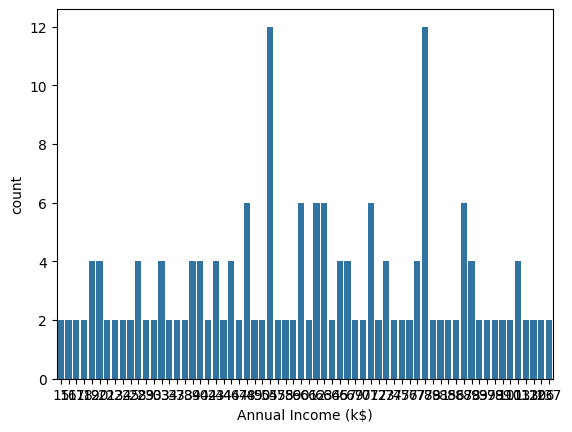

In [14]:
sns.countplot(data=df, x='Annual Income (k$)')

<Axes: xlabel='Spending Score (1-100)', ylabel='count'>

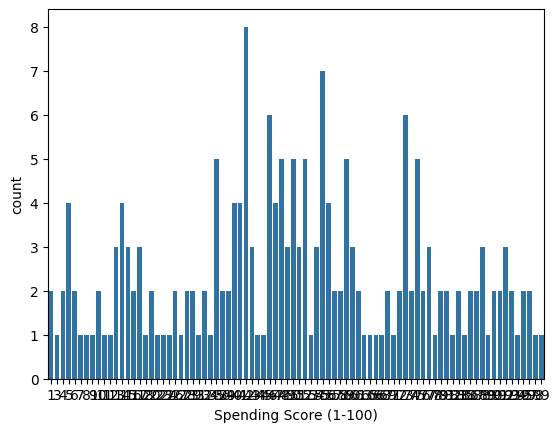

In [15]:
sns.countplot(data=df, x='Spending Score (1-100)')

In [16]:
df.isnull().sum().sum()

np.int64(0)

In [17]:
df.corr()

,Annual Income (k$),Spending Score (1-100)
Annual Income (k$),1.000000,0.009903
Spending Score (1-100),0.009903,1.000000


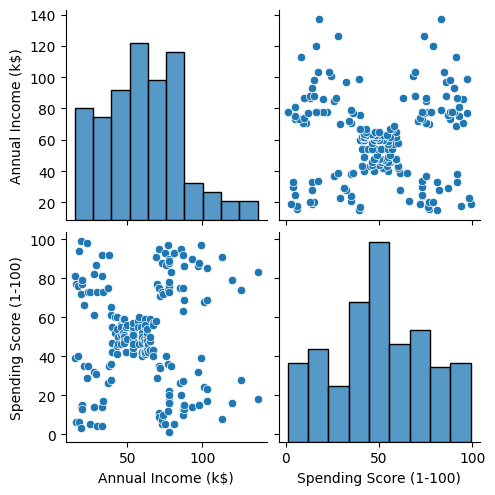

In [18]:
sns.pairplot(data=df)

# Normalization Data

In [19]:
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [20]:
scaler_train=scaler.transform(df)

# K-means Clustering tuninig

In [21]:
objective_function=[]
for i in range(1,11):
    clustering=KMeans(n_clusters=i, init='k-means++')
    clustering.fit(scaler_train)
    objective_function.append(clustering.inertia_)
#inertia is calculaing min intra cluster distance
# objective function contains min intra cluster distances
objective_function

[399.99999999999994,
 274.81336539941356,
 195.2466301907915,
 109.22822707921345,
 65.56840815571681,
 57.38174746022787,
 44.91271612308711,
 37.148116972291106,
 32.33081392367578,
 31.667793395778357]

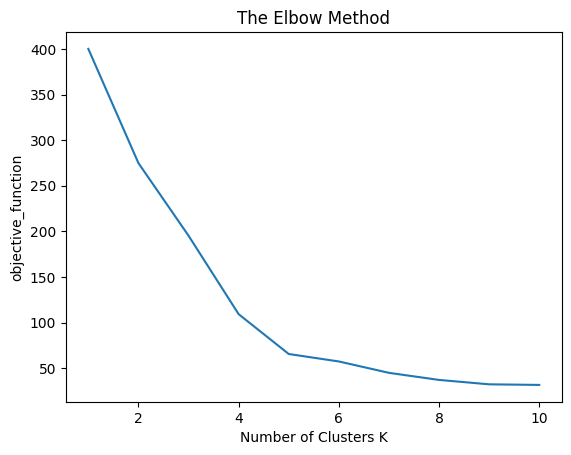

In [22]:
plt.plot(range(1,11),objective_function)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters K')
plt.ylabel('objective_function')
plt.show()

In [23]:
# Training the model with optimal no of clusters
clustering=KMeans(n_clusters=5,init='k-means++',random_state=0)
labels=clustering.fit_predict(scaler_train)
# x and y  coordinates of all clusters
# Centroids of clusters
clustering.cluster_centers_[:]

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788]])

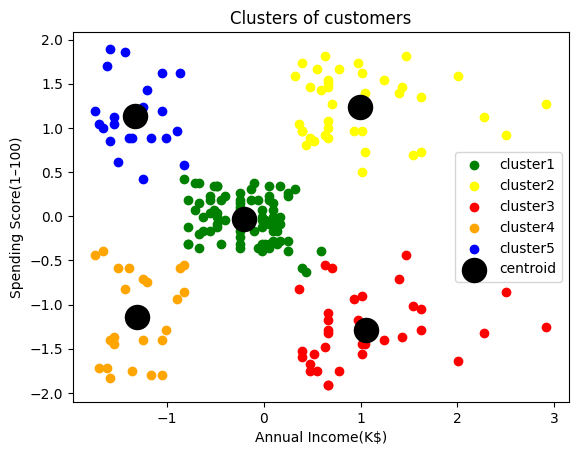

In [27]:
# visualizing the clusters
plt.scatter(scaler_train[labels==0,0],scaler_train[labels==0,1],c='green',label='cluster1')
plt.scatter(scaler_train[labels==1,0],scaler_train[labels==1,1],c='yellow',label='cluster2')
plt.scatter(scaler_train[labels==2,0],scaler_train[labels==2,1],c='red',label='cluster3')
plt.scatter(scaler_train[labels==3,0],scaler_train[labels==3,1],c='orange',label='cluster4')
plt.scatter(scaler_train[labels==4,0],scaler_train[labels==4,1],c='blue',label='cluster5')
plt.scatter(clustering.cluster_centers_[:,0],clustering.cluster_centers_[:,1],s=300,c='black',label='centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1–100)')
plt.legend()
plt.show()

In [25]:
clustering.inertia_

65.56840815571681

/tmp/ipython-input-1585070727.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],cmap='brg')


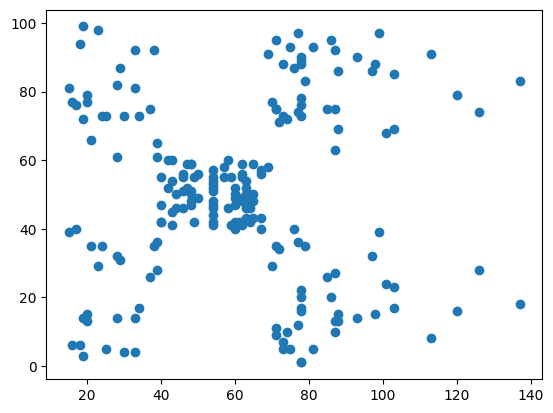

In [26]:
plt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],cmap='brg')